<a href="https://colab.research.google.com/github/agodoi/2tiao/blob/main/GabaritoCap02GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving kaggle.json to kaggle (1).json
Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other

100% 2.29G/2.29G [00:27<00:00, 68.4MB/s]
100% 2.29G/2.29G [00:27<00:00, 89.3MB/s]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.5180 - loss: 1.0178 - val_accuracy: 0.8188 - val_loss: 0.5344
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7711 - loss: 0.4947 - val_accuracy: 0.8562 - val_loss: 0.4014
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8167 - loss: 0.4007 - val_accuracy: 0.8875 - val_loss: 0.2981
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9152 - loss: 0.2746 - val_accuracy: 0.8375 - val_loss: 0.3960
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8882 - loss: 0.2859 - val_accuracy: 0.9125 - val_loss: 0.2198
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9377 - loss: 0.1961 - val_accuracy: 0.9187 - val_loss: 0.1929
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9363 - loss: 0.1686 - val_accuracy: 0.9125 - val_loss: 0.2018
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9241 - loss: 0.1792 - val_accuracy: 0.8750 - v

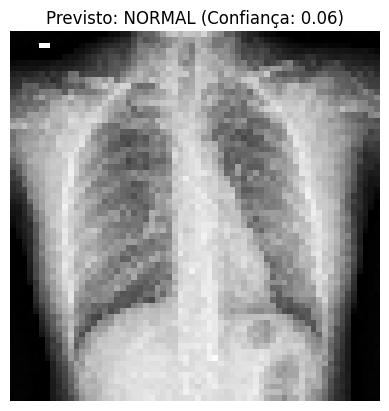

In [ ]:
# Etapa 1: Upload do kaggle.json (no Google Colab)
from google.colab import files
files.upload()  # Carregue seu kaggle.json aqui

# Etapa 2: Configurar o Kaggle API
import os
import zipfile

os.makedirs("/root/.kaggle", exist_ok=True)
os.rename("kaggle.json", "/root/.kaggle/kaggle.json")
os.chmod("/root/.kaggle/kaggle.json", 600)

# Etapa 3: Baixar o dataset do Kaggle
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

# Etapa 4: Extrair os arquivos
with zipfile.ZipFile("chest-xray-pneumonia.zip", 'r') as zip_ref:
    zip_ref.extractall("chest_xray")

# Etapa 5: Carregar e preparar os dados
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split

# Usar apenas uma amostra para MLP: NORMAL e PNEUMONIA (train folder)
data_dir = "chest_xray/chest_xray/train"
categories = ['NORMAL', 'PNEUMONIA']
data = []
labels = []

for label in categories:
    folder_path = os.path.join(data_dir, label)
    for file in os.listdir(folder_path)[:500]:  # Limitar para facilitar
        img = load_img(os.path.join(folder_path, file), target_size=(64, 64), color_mode='grayscale')
        img_array = img_to_array(img) / 255.0
        data.append(img_array.flatten())  # MLP precisa de vetor 1D
        labels.append(0 if label == 'NORMAL' else 1)

X = np.array(data)
y = np.array(labels)

# Dividir em treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construir a rede neural MLP
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Avaliar o desempenho
loss, acc = model.evaluate(X_test, y_test)
print(f"\nAcurácia no teste: {acc:.2f}")

# Visualizar uma previsão aleatória
import random
idx = random.randint(0, len(X_test)-1)
sample_img = X_test[idx].reshape(64, 64)
pred = model.predict(X_test[idx:idx+1])[0][0]

plt.imshow(sample_img, cmap='gray')
plt.title(f"Previsto: {'PNEUMONIA' if pred > 0.5 else 'NORMAL'} (Confiança: {pred:.2f})")
plt.axis('off')
plt.show()
